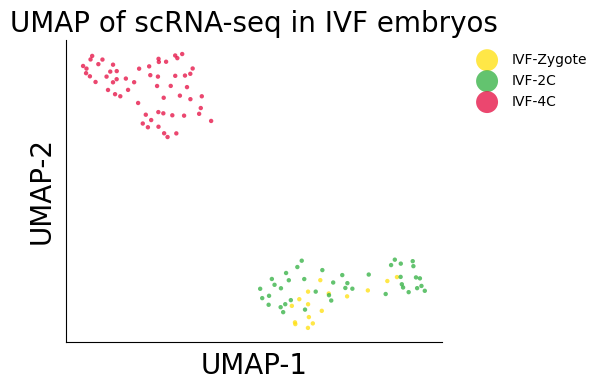

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 自定义颜色（根据你的数据修改或扩展）
color_map = {
    "IVF-Zygote": "#ffe119",  # 黄色
    "IVF-2C": "#3cb44b",      # 绿色
    "IVF-4C": "#e6194b"       # 红色
}

# 读取 IVF_118cells_UMAP_coordinates.txt
umap_df = pd.read_csv("IVF_118cells_UMAP_coordinates.txt", sep="\t")


# 绘图参数
ds = 10
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('UMAP-1', fontsize=20)
ax.set_ylabel('UMAP-2', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('UMAP of scRNA-seq in IVF embryos', fontsize=20)

# 绘制散点图
for cell_type, color in color_map.items():
    sub_df = umap_df[umap_df['Cell_Class'] == cell_type]
    ax.scatter(
        sub_df['UMAP_1'],
        sub_df['UMAP_2'],
        c=color,
        s=ds,
        edgecolors='none',
        alpha=0.8,
        label=cell_type,
        rasterized=True
    )

# 图例
ax.legend(
    markerscale=5,
    prop={'size': 10},
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=15,
    frameon=False
)

plt.tight_layout()

# 保存为 PDF

plt.savefig('IVF_118cells_umap_plot.svg', dpi=300, bbox_inches='tight', transparent=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IVF-Zygote vs. IVF-2C: Mann-Whitney-Wilcoxon test two-sided, P_val:2.649e-02 U_stat=3.408e+04
IVF-2C vs. IVF-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:9.817e-04 U_stat=4.907e+05
IVF-Zygote vs. IVF-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:4.534e-05 U_stat=7.709e+04


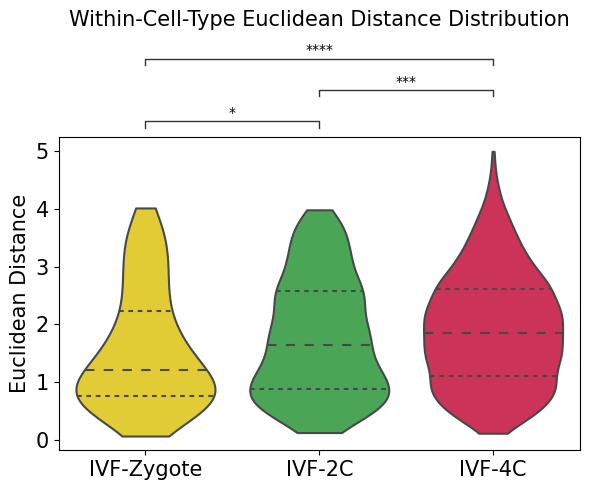

In [10]:
# scRNAseq 分析：计算组内欧氏距离并绘图（去除 IVF-2C 中大于 4.5 的距离）

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from statannotations.Annotator import Annotator
from IPython.display import SVG, display

# 字体与 SVG 配置
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取 IVF_118cells_UMAP_coordinates.txt 文件
umap_df = pd.read_csv("IVF_118cells_UMAP_coordinates.txt", sep="\t")

# 只保留必要列，并移除缺失值
umap_df = umap_df.dropna(subset=["UMAP_1", "UMAP_2", "Cell_Class"])

# 分组计算组内欧氏距离，并对 IVF-2C 去除大于 4.5 的点
distance_data = []
for cell_class in umap_df["Cell_Class"].unique():
    sub_df = umap_df[umap_df["Cell_Class"] == cell_class]
    coords = sub_df[["UMAP_1", "UMAP_2"]].values
    if len(coords) > 1:
        distances = pdist(coords, metric="euclidean")
        for d in distances:
            if cell_class == "IVF-2C" and d > 4:
                continue  # 去除 IVF-2C 中欧氏距离大于 4.5 的点
            distance_data.append({"Cell Type": cell_class, "Distance": d})

# 转为 DataFrame
distance_df = pd.DataFrame(distance_data)

# 自定义颜色（可根据实际类别调整）
color_map = {
    "IVF-Zygote": "#ffe119",
    "IVF-2C": "#3cb44b",
    "IVF-4C": "#e6194b"
}

# 分类顺序（确保小提琴图按你想要的顺序显示）
order = ['IVF-Zygote', 'IVF-2C', 'IVF-4C']

# 绘图
plt.figure(figsize=(6, 5))
ax = plt.gca()

sns.violinplot(
    x="Cell Type", y="Distance", data=distance_df,
    palette=color_map, order=order,
    inner="quart", cut=0, scale="width", ax=ax
)

# 添加显著性标注
pairs = [("IVF-Zygote", "IVF-2C"), ("IVF-2C", "IVF-4C"), ("IVF-Zygote", "IVF-4C")]
annotator = Annotator(ax, pairs, data=distance_df, x="Cell Type", y="Distance", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.02,
                    line_width=1, loc='outside', fontsize=10)
annotator.apply_and_annotate()

# 设置标签和标题
plt.title('Within-Cell-Type Euclidean Distance Distribution', fontsize=15, pad=80)
plt.xlabel('')
plt.ylabel('Euclidean Distance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

# 保存图像
plt.savefig('IVF_118cells_UMAP_within_distance_violinplot.svg', dpi=300, bbox_inches='tight', transparent=True)


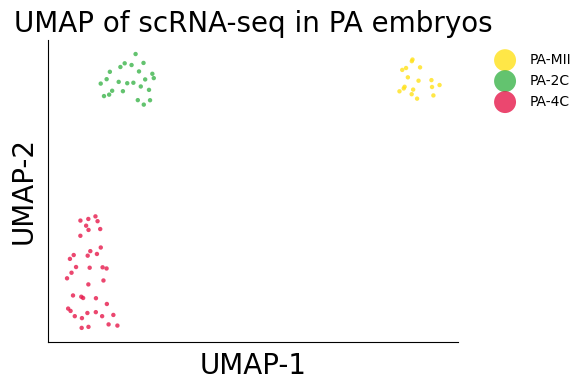

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 自定义颜色（根据你的数据修改或扩展）
color_map = {
    "PA-MII": "#ffe119",  # 黄色
    "PA-2C": "#3cb44b",      # 绿色
    "PA-4C": "#e6194b"       # 红色
}

# 读取 IVF_118cells_UMAP_coordinates.txt
umap_df = pd.read_csv("PA_80cells_UMAP_coordinates.txt", sep="\t")


# 绘图参数
ds = 10
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('UMAP-1', fontsize=20)
ax.set_ylabel('UMAP-2', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('UMAP of scRNA-seq in PA embryos', fontsize=20)

# 绘制散点图
for cell_type, color in color_map.items():
    sub_df = umap_df[umap_df['Cell_Class'] == cell_type]
    ax.scatter(
        sub_df['UMAP_1'],
        sub_df['UMAP_2'],
        c=color,
        s=ds,
        edgecolors='none',
        alpha=0.8,
        label=cell_type,
        rasterized=True
    )

# 图例
ax.legend(
    markerscale=5,
    prop={'size': 10},
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=15,
    frameon=False
)

plt.tight_layout()

# 保存为 PDF

plt.savefig('PA_80cells_umap_plot.svg', dpi=300, bbox_inches='tight', transparent=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PA-MII vs. PA-2C: Mann-Whitney-Wilcoxon test two-sided, P_val:5.516e-05 U_stat=1.418e+04
PA-2C vs. PA-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:1.243e-20 U_stat=6.347e+04
PA-MII vs. PA-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:9.533e-26 U_stat=2.190e+04


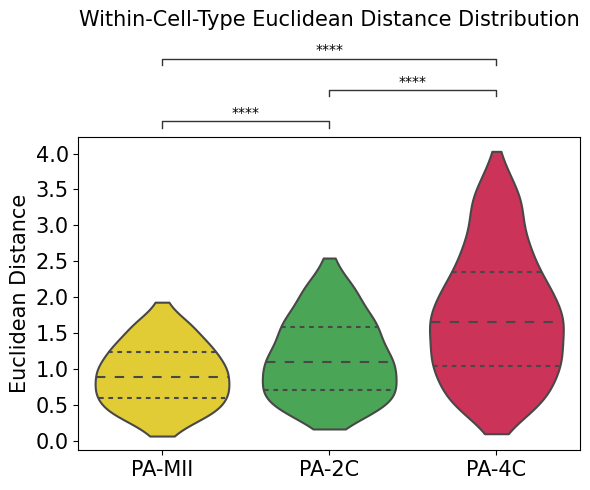

In [4]:
#scRNAseq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from statannotations.Annotator import Annotator

from IPython.display import SVG, display

# 字体与 SVG 配置
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取 IVF_118cells_UMAP_coordinates.txt 文件
umap_df = pd.read_csv("PA_80cells_UMAP_coordinates.txt", sep="\t")

# 只保留必要列，并移除缺失值
umap_df = umap_df.dropna(subset=["UMAP_1", "UMAP_2", "Cell_Class"])

# 分组计算组内欧氏距离
distance_data = []
for cell_class in umap_df["Cell_Class"].unique():
    sub_df = umap_df[umap_df["Cell_Class"] == cell_class]
    coords = sub_df[["UMAP_1", "UMAP_2"]].values
    if len(coords) > 1:
        distances = pdist(coords, metric="euclidean")
        for d in distances:
            distance_data.append({"Cell Type": cell_class, "Distance": d})

# 转为 DataFrame
distance_df = pd.DataFrame(distance_data)

# 自定义颜色（可根据实际类别调整）
color_map = {
    "PA-MII": "#ffe119",  # 黄色
    "PA-2C": "#3cb44b",      # 绿色
    "PA-4C": "#e6194b"       # 红色
}

# 分类顺序（确保小提琴图按你想要的顺序显示）
order = ['PA-MII', 'PA-2C', 'PA-4C']

# 绘图
plt.figure(figsize=(6, 5))
ax = plt.gca()

sns.violinplot(
    x="Cell Type", y="Distance", data=distance_df,
    palette=color_map, order=order,
    inner="quart", cut=0, scale="width", ax=ax
)

# 添加显著性标注
pairs = [("PA-MII", "PA-2C"), ("PA-2C", "PA-4C"), ("PA-MII", "PA-4C")]
annotator = Annotator(ax, pairs, data=distance_df, x="Cell Type", y="Distance", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.02,
                    line_width=1, loc='outside', fontsize=10)
annotator.apply_and_annotate()

# 设置标签和标题
plt.title('Within-Cell-Type Euclidean Distance Distribution', fontsize=15, pad=80)
plt.xlabel('')
plt.ylabel('Euclidean Distance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

# 保存图像
plt.savefig('PA_80cells_UMAP_within_distance_violinplot.svg', dpi=300, bbox_inches='tight', transparent=True)
